<a href="https://colab.research.google.com/github/abhijitpal1247/OGD-Data-Analysis/blob/main/Startup_Hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

List of all Startups from Meity Startup Hub

[Dataset link](https://data.gov.in/resource/list-all-startups-meity-startup-hub)

In [ ]:
! pip install geopy
! pip install geopandas
! pip install leafmap
! pip install folium matplotlib mapclassify

In [69]:
import time
import pandas as pd
import PIL
import geopandas
from tqdm import tqdm
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import leafmap.foliumap as leafmap
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
tqdm.pandas()

In [3]:
df=pd.read_csv('Listofstartups.csv', encoding='iso-8859-1')

In [4]:
df

,Incubation Center,Name of the startup,Location of company,Sector,Company profile
0,SIIC IIT KANPUR,E-Trainer Analytics Wizard Pvt ltd,New Delhi,Fit-Tech,"Fitbuddy, a flagship brand under E-Trainer Ana..."
1,SIIC IITK,Invariance Automation Private Limited,"Kanpur, UP",Industrial Automation,Currently we are developing the infrastructure...
2,"SIIC, IIT Kanpur",Neoperk Technologies Pvt. Ltd.,"Mumbai, Maharashtra",Agri-Tech - Soil Testing,Neoperk makes large scale soil testing extreme...
3,SIIC IIT KANPUR,WeRehab Technologies Pvt Ltd,Nagpur,Health tech,WeRehab Technologies Pvt Ltd. Is a startup fou...
4,IIT Kanpur,Arthavedika Tech Pvt Ltd,"Noida, Uttar Pradesh",Fintech,Arthavedika Tech Pvt Ltd is a DIPP certified t...
...,...,...,...,...,...
236,IITM Incubation Cell,InuAid Solutions Private Limited,Chennai,Artificial Intelligence / Machine Learning / I...,"InuAid provides Artificial intelligence (AI), ..."
237,IITM Incubation Cell,Revoh Innovations Private limited,Chennai,Infra and Transportation,Revoh is building technology solutions for BLD...
238,IITM Incubation Cell,Good Move Logistics & Transport Private limited,Chennai,Logistics,The company aims to promote safe deliveries of...
239,CTIE,Encephalon Solutions,"Hubli, Karnataka",Medical,Focused on making Electro-Mechanical devices f...


<Axes: xlabel='Incubation Center'>

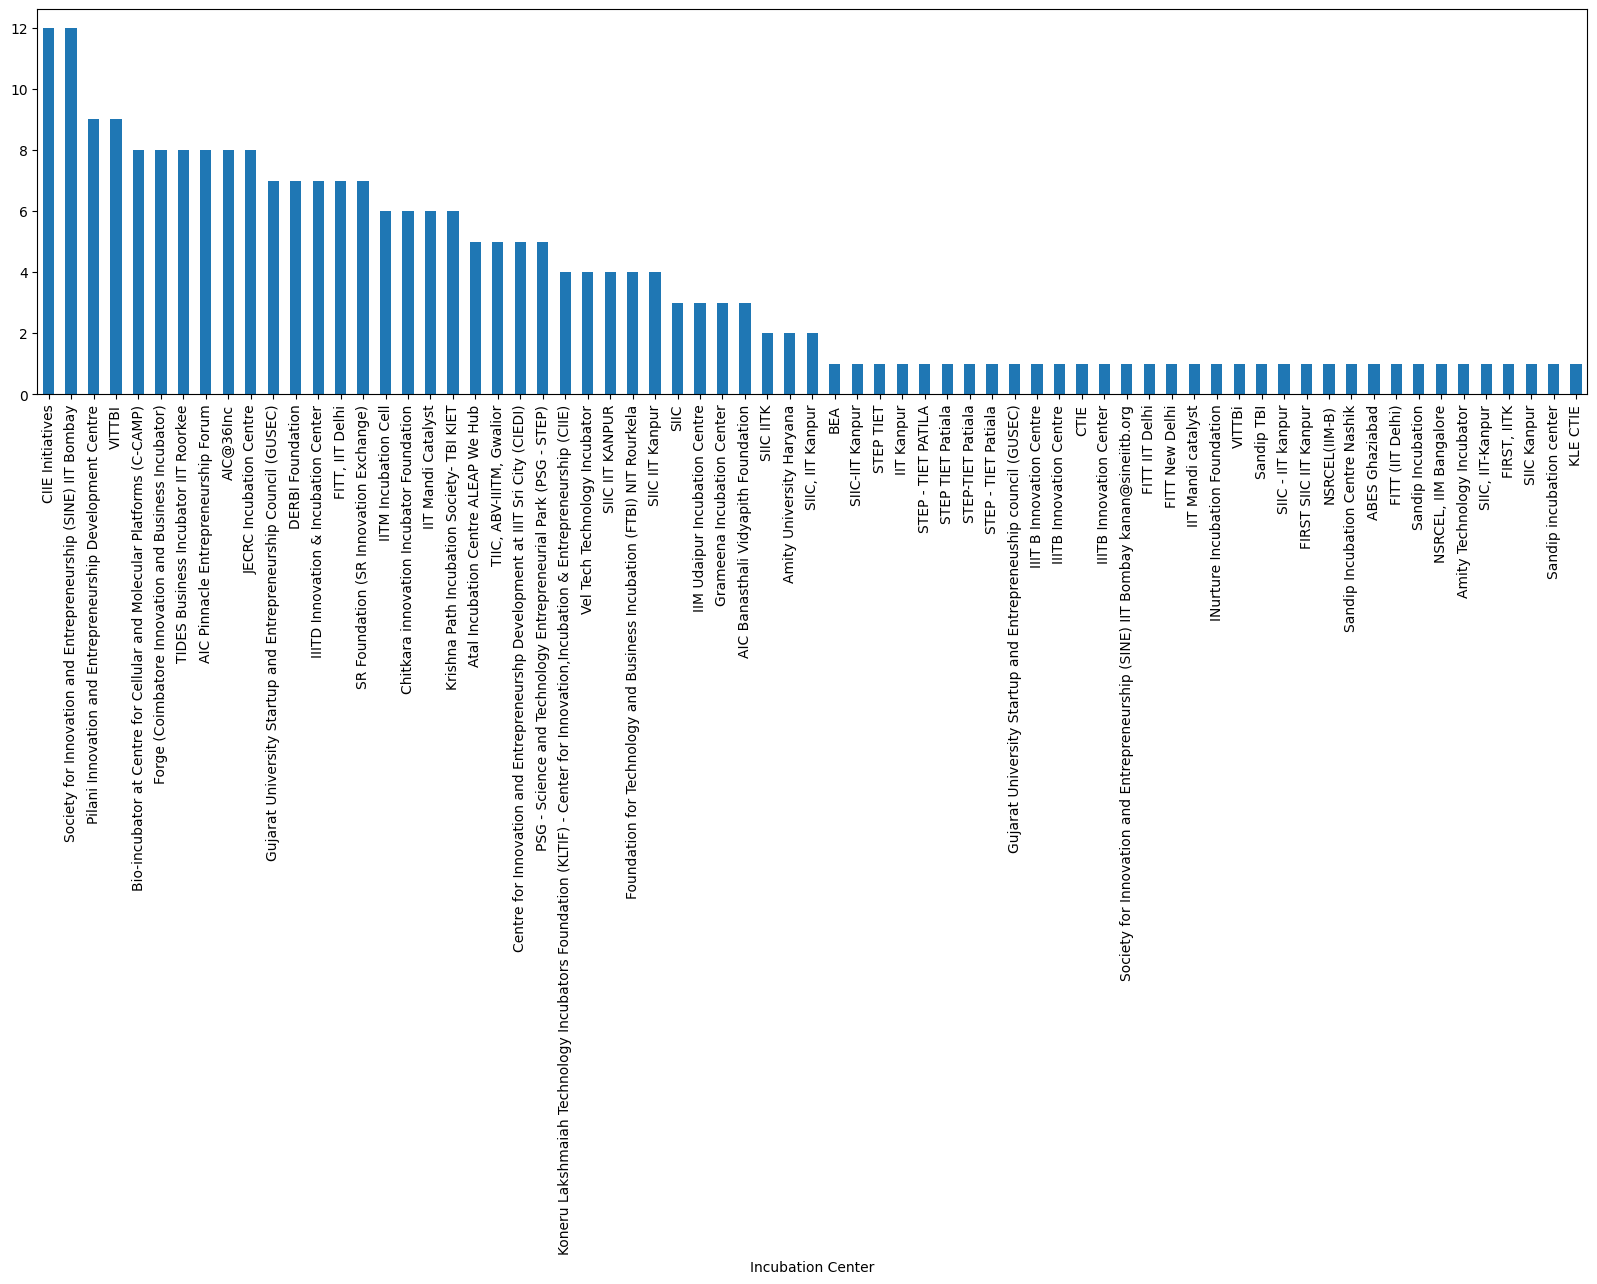

In [5]:
df['Incubation Center'].value_counts().plot.bar(y='Incubation Center', figsize=(20, 5))

<Axes: xlabel='Sector'>

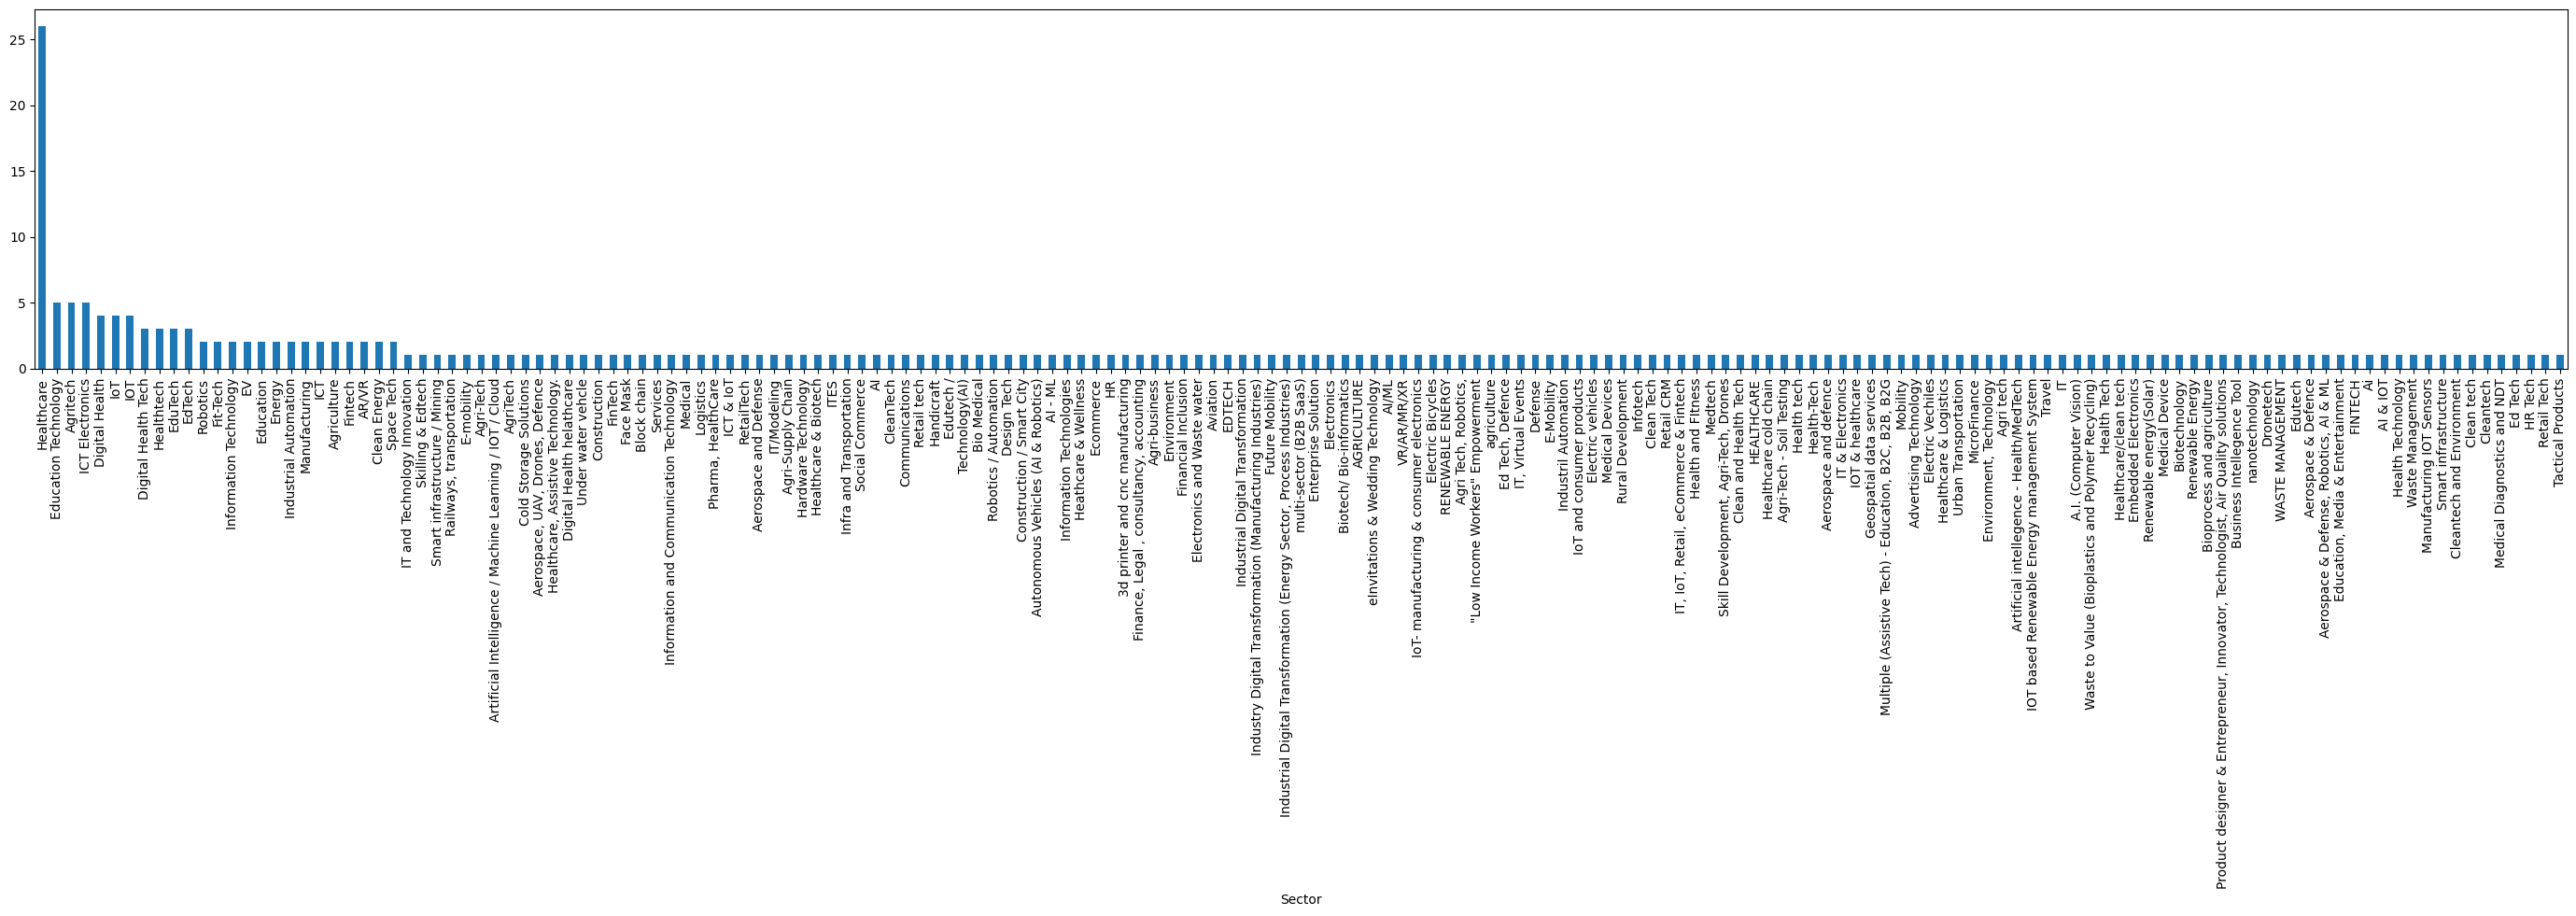

In [6]:
df['Sector'].value_counts().plot.bar(y='Sector', figsize=(35, 5))

In [7]:
df['Sector'].dropna(inplace=True)

In [8]:
def get_location(loc):
  app = Nominatim(user_agent="sample", timeout=10)
  rateLimiter = RateLimiter(app.geocode, min_delay_seconds=1)
  # Get location raw data from the user
  while True:
    try:
      location = rateLimiter(loc)
      return location
    except Exception as e:
      print(e)
      time.sleep(5)

In [9]:
df["location_raw"] = df["Location of company"].progress_apply(lambda x: get_location(x))

100%|██████████| 241/241 [02:03<00:00,  1.96it/s]


In [10]:
df['location_raw'][0]

Location(New Delhi District, Delhi, India, (28.6138954, 77.2090057, 0.0))

In [11]:
df['latitude'] = df["location_raw"].apply(lambda x: x.latitude if x else None)
df['longitude'] = df["location_raw"].apply(lambda x: x.longitude if x else None)

In [26]:
df.drop('location_raw', axis=1, inplace=True)

In [27]:
geometry = geopandas.points_from_xy(df.longitude, df.latitude)

In [28]:
geo_df = geopandas.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

In [35]:
geo_df = geo_df[~geo_df.is_empty]

In [67]:
m=leafmap.Map(width=800, height=400)
geo_df.explore(m=m)
m.zoom_to_gdf(geo_df)
m

Output of the above cell


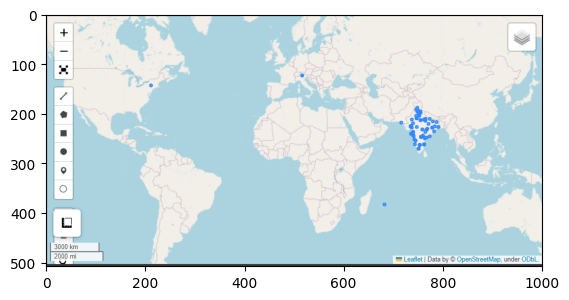

In [71]:
plt.imshow(PIL.Image.open('locations.png'))